In [13]:
from pathlib import Path
from src.load_data import load_data
import numpy as np
import trackpy as tp
import matplotlib.pyplot as plt
from typing import Optional
import numexpr as ne
import numpy.typing as npt
from src.background import remove_background
import plotly.express as px

In [4]:
filepath = Path("/Users/charles/Documents/GitHub/LumIn-microscopie-fluorescence/data/EMCV_0523_3TpB.tif")
filepath = Path("/Users/charles/Documents/GitHub/LumIn-microscopie-fluorescence/data/DIRES_1020_2TpR.tif")

In [5]:
data = load_data(filepath=filepath, color_sequence="rg")
frames = data["r"]

In [43]:
frame = frames[0]
transformed = remove_background(frame, kernel_size=101)
background = frame - transformed

In [44]:
f = tp.locate(frame, diameter=9, minmass=200)

In [156]:
f.head()

y           x        mass      size       ecc     signal  raw_mass  \
0   5.600000  386.428571  632.454364  1.726543  0.199965  60.233749   14018.0   
1   6.792208  339.246753  231.899933  1.381699  0.304843  30.116874   12718.0   
2   8.915152  166.915152  496.928429  1.702049  0.228477  45.175312   11319.0   
3  10.427419  290.580645  746.898487  1.464637  0.182484  93.362311   14479.0   
4   8.780000  323.508000  752.921862  2.019901  0.119523  69.268811   14435.0   

         ep  
0  0.249765  
1  0.384062  
2  0.911480  
3  0.222211  
4  0.224576

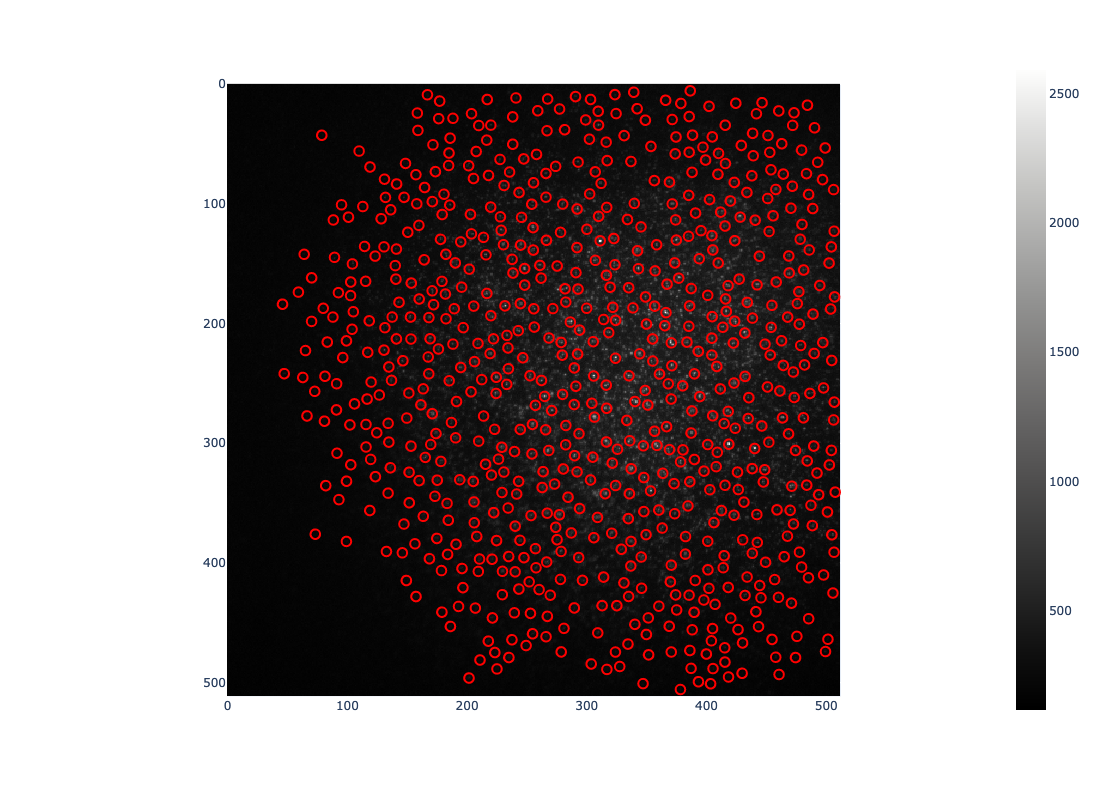

In [45]:
fig = px.imshow(frame, color_continuous_scale='gray')

for (_, row) in f.iterrows():
    x = row.x
    y = row.y
    radius = row.size / 2

    fig.add_shape(type="circle",
        x0=x-radius, y0=y-radius, x1=x+radius, y1=y+radius,
        line_color="red",
    )        

# Set figure size
fig.update_layout(width=800, height=800)

fig.show()